# CONVOLUTIONAL NEURAL NETWORK (CNN) BASICS

## Importing Libraries

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

==========

## MNIST "Modified National Institute of Standards and Technology" (Handwritten Digits) | Convolutional Neural Network (CNN) Case-study

MNIST Dataset: http://yann.lecun.com/exdb/mnist/

In [39]:
from IPython.display import Image
Image('imgs/MNIST.png') 

FileNotFoundError: No such file or directory: 'imgs/MNIST.png'

FileNotFoundError: No such file or directory: 'imgs/MNIST.png'

<IPython.core.display.Image object>

### Loading & Inspecting Data

In [40]:
from keras.datasets import fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [41]:
X_train[0].shape

(28, 28)

In [42]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [43]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

### Exploring Data

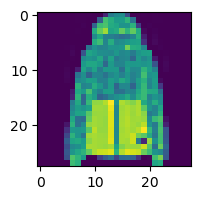

In [44]:
plt.figure(figsize=(2,2))
plt.imshow(X_train[22,:,:])
plt.show()

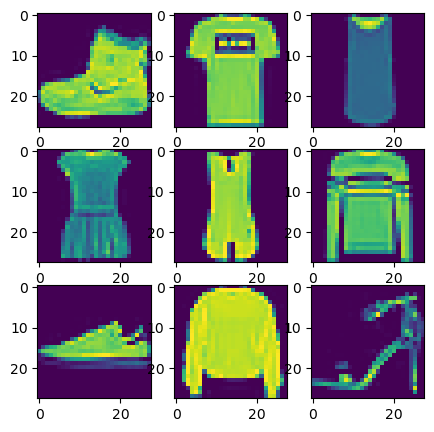

In [45]:
plt.figure(figsize=(5,5))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(X_train[i,:,:])

### Preparing Data

In [46]:
X_train.shape

(60000, 28, 28)

In [47]:
X_train = X_train.reshape((60000, 28, 28, 1)) # reshaping
X_train = X_train.astype('float32') / 255 # normalizing

In [48]:
X_train.shape

(60000, 28, 28, 1)

In [49]:
# X_train

In [50]:
X_test = X_test.reshape((10000, 28, 28, 1))
X_test = X_test.astype('float32') / 255

In [51]:
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

==========

### 1] Using Convolutional Neural Network (CNN)

Image Kernel Demo: https://setosa.io/ev/image-kernels/

CNN Demo: https://adamharley.com/nn_vis/cnn/3d.html

##### Model Building

In [52]:
from keras import layers
from keras import models

In [53]:
cnn = models.Sequential()

# feature extraction 
cnn.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))    #convoltion layer 
cnn.add(layers.MaxPooling2D((2, 2)))                                                # pooling 


cnn.add(layers.Conv2D(64, (3, 3), activation='relu'))                            # convoltion layer                    
cnn.add(layers.MaxPooling2D((2, 2)))                                             # max pooling 

cnn.add(layers.Conv2D(64, (3, 3), activation='relu'))

# fully-connected layer                    build ann
cnn.add(layers.Flatten())
cnn.add(layers.Dense(64, activation='relu'))
cnn.add(layers.Dense(10, activation='softmax'))

In [54]:
cnn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 576)              

In [55]:
cnn.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

##### Model Training

In [56]:
cnn.fit(X_train, y_train, epochs=5, batch_size=64)

Epoch 1/5
938/938 [==============================] - 22s 22ms/step - loss: 0.5593 - accuracy: 0.7924
Epoch 2/5
938/938 [==============================] - 25s 27ms/step - loss: 0.3376 - accuracy: 0.8764
Epoch 3/5
938/938 [==============================] - 26s 27ms/step - loss: 0.2868 - accuracy: 0.8943
Epoch 4/5
938/938 [==============================] - 26s 27ms/step - loss: 0.2538 - accuracy: 0.9053
Epoch 5/5
938/938 [==============================] - 25s 27ms/step - loss: 0.2310 - accuracy: 0.9148


##### Model Evaluation

In [57]:
test_loss, test_acc = cnn.evaluate(X_test, y_test)
test_acc

313/313 [==============================] - 2s 5ms/step - loss: 0.2692 - accuracy: 0.9051


0.9050999879837036

In [ ]:
# pd.DataFrame(cnn.history.history).plot()

##### Model Prediction

In [59]:
y_pred = cnn.predict(X_test)

313/313 [==============================] - 2s 6ms/step


In [60]:
y_pred = np.argmax(np.round(y_pred),axis=1)
y_pred

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

In [61]:
y_test = np.argmax(np.round(y_test),axis=1)
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

In [62]:
for i in range(0,10):
    print(y_pred[i], y_test[i])

9 9
2 2
1 1
1 1
6 6
1 1
4 4
6 6
5 5
7 7


In [63]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [64]:
print(confusion_matrix(y_test, y_pred))

[[879   0   6  21   3   0  86   0   5   0]
 [  8 970   0  17   2   0   1   0   2   0]
 [ 62   0 814  11  48   0  65   0   0   0]
 [ 31   2   8 926  10   0  22   0   1   0]
 [ 36   1  34  32 835   0  62   0   0   0]
 [  2   0   0   0   0 983   0   6   2   7]
 [170   0  41  24  63   0 692   0  10   0]
 [  2   0   0   0   0  16   0 966   0  16]
 [ 13   0   2   2   1   1   5   3 973   0]
 [  4   0   0   0   0   4   0  39   0 953]]


In [65]:
print(accuracy_score(y_test, y_pred))

0.8991


In [24]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.01      0.00      0.00      1000
           1       0.23      0.03      0.05      1000
           2       0.00      0.00      0.00      1000
           3       0.00      0.00      0.00      1000
           4       0.00      0.00      0.00      1000
           5       0.00      0.00      0.00      1000
           6       0.00      0.00      0.00      1000
           7       0.06      0.03      0.04      1000
           8       0.08      0.21      0.11      1000
           9       0.07      0.43      0.11      1000

    accuracy                           0.07     10000
   macro avg       0.04      0.07      0.03     10000
weighted avg       0.04      0.07      0.03     10000



C:\Users\fg\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fg\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fg\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


==========

### 2] Using Artificial Neural Network (ANN)

MLP Demo: https://adamharley.com/nn_vis/mlp/3d.html

##### Reshaping Data (Flattening)

In [66]:
X_train = X_train.reshape((-1, 28 * 28))
X_test = X_test.reshape((-1, 28 * 28))

##### Model Building

In [67]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [68]:
ann = Sequential()
ann.add(Dense(units = 128, activation = 'relu', input_shape=(784,)))
ann.add(Dropout(0.3))
ann.add(Dense(units = 10, activation = 'softmax'))

In [69]:
ann.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 128)               100480    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [70]:
ann.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

##### Model Training

In [71]:
ann.fit(X_train, y_train, epochs=5, batch_size=64)

Epoch 1/5
938/938 [==============================] - 4s 3ms/step - loss: 0.5769 - accuracy: 0.7950
Epoch 2/5
938/938 [==============================] - 3s 3ms/step - loss: 0.4275 - accuracy: 0.8477
Epoch 3/5
938/938 [==============================] - 3s 3ms/step - loss: 0.3961 - accuracy: 0.8584
Epoch 4/5
938/938 [==============================] - 3s 3ms/step - loss: 0.3752 - accuracy: 0.8659
Epoch 5/5
938/938 [==============================] - 3s 3ms/step - loss: 0.3641 - accuracy: 0.8693


##### Model Evaluation

In [ ]:
# pd.DataFrame(ann.history.history).plot()

##### Model Prediction

In [72]:
y_pred = ann.predict(X_test)

313/313 [==============================] - 1s 1ms/step


In [73]:
y_pred = np.argmax(np.round(y_pred),axis=1)
y_pred

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

In [74]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

In [75]:
for i in range(0,10):
    print(y_pred[i], y_test[i])

9 9
2 2
1 1
1 1
6 6
1 1
4 4
6 6
5 5
7 7


In [76]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [77]:
print(confusion_matrix(y_test, y_pred))

[[875   0  11   6   0   0 100   0   8   0]
 [ 23 956   1  15   2   0   1   0   2   0]
 [143   0 732   4  57   0  62   0   2   0]
 [182   3   5 763   8   0  34   0   5   0]
 [185   1  84  16 569   0 136   0   9   0]
 [  5   0   0   0   0 966   0  14   1  14]
 [251   1  79   6  23   0 624   0  16   0]
 [ 17   0   0   0   0  47   0 890   0  46]
 [ 18   0   1   1   1   2   5   3 969   0]
 [  8   0   0   0   0   7   1  19   0 965]]


In [78]:
print(accuracy_score(y_test, y_pred))

0.8309


In [79]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.51      0.88      0.65      1000
           1       0.99      0.96      0.98      1000
           2       0.80      0.73      0.77      1000
           3       0.94      0.76      0.84      1000
           4       0.86      0.57      0.69      1000
           5       0.95      0.97      0.96      1000
           6       0.65      0.62      0.64      1000
           7       0.96      0.89      0.92      1000
           8       0.96      0.97      0.96      1000
           9       0.94      0.96      0.95      1000

    accuracy                           0.83     10000
   macro avg       0.86      0.83      0.83     10000
weighted avg       0.86      0.83      0.83     10000



==========

### 3] Using Machine Learning

##### Model Building & Training

In [80]:
from sklearn.svm import SVC

In [81]:
svm = SVC(C=5, gamma=0.05, kernel='rbf', random_state=0)

In [82]:
svm.fit(X_train,y_train)

ValueError: y should be a 1d array, got an array of shape (60000, 10) instead.

##### Model Evalution

In [83]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [84]:
y_pred = svm.predict(X_test)

NotFittedError: This SVC instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
print(confusion_matrix(y_test, y_pred))

In [ ]:
print(accuracy_score(y_test, y_pred))

==========

# THANK YOU!